In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows',2000)
plt.rcParams['font.family'] = 'AppleGothic'

In [449]:
df = pd.read_csv("/Users/juwonkim/Desktop/캡스톤 디자인/archive/results.csv",encoding='cp949',index_col=0) 
df.shape

(11113, 22)

Column	Description
Season	Match Season
DateTime	Match Date and Time (yyyy-mm-dd hh:mm:ss)
HomeTeam	Home Team
AwayTeam	Away Team
FTHG	Full Time Home Team Goals
FTAG	Full Time Away Team Goals
FTR	Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG	Half Time Home Team Goals
HTAG	Half Time Away Team Goals
HTR	Half Time Result (H=Home Win, D=Draw, A=Away Win)
Referee	Match Referee
HS	Home Team Shots
AS	Away Team Shots
HST	Home Team Shots on Target
AST	Away Team Shots on Target
HC	Home Team Corners
AC	Away Team Corners
HF	Home Team Fouls Committed
AF	Away Team Fouls Committed
HY	Home Team Yellow Cards
AY	Away Team Yellow Cards
HR	Home Team Red Cards
AR	Away Team Red Cards

In [394]:
df

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0


In [395]:
df.columns

Index(['DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF',
       'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [396]:
df.tail()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,A Taylor,11.0,6.0,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [450]:
# 모든 통계량이 측정된 시즌부터 반영
df = df[df['DateTime']>'2000-08']

In [451]:
df.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,Graham Barber,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,Barry Knight,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,Andy D'Urso,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,Dermot Gallagher,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [452]:
df.tail()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,A Taylor,11.0,6.0,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [399]:
teams = ['Arsenal', 'Liverpool', 'Man City', 'Tottenham', 'Chelsea', 'Man United']

condition_exists = df['HomeTeam'].isin(teams) & df['AwayTeam'].isin(teams)

if condition_exists.any():
    big6 = df[condition_exists]
else:
    big6 = pd.DataFrame()

big6.head()


,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-21T00:00:00Z,Arsenal,Liverpool,2,0,H,1.0,0.0,H,Graham Poll,17.0,7.0,12.0,4.0,10.0,11.0,25.0,20.0,2.0,4.0,1.0,2.0
2000-01,2000-09-06T00:00:00Z,Chelsea,Arsenal,2,2,D,1.0,0.0,H,Mike Riley,12.0,13.0,5.0,5.0,7.0,6.0,16.0,22.0,3.0,1.0,0.0,0.0
2000-01,2000-09-09T00:00:00Z,Liverpool,Man City,3,2,H,1.0,0.0,H,Graham Barber,14.0,9.0,8.0,7.0,9.0,4.0,17.0,17.0,3.0,4.0,0.0,0.0
2000-01,2000-09-23T00:00:00Z,Man United,Chelsea,3,3,D,3.0,2.0,H,Peter Jones,11.0,13.0,5.0,5.0,8.0,4.0,15.0,19.0,3.0,2.0,0.0,0.0
2000-01,2000-09-23T00:00:00Z,Tottenham,Man City,0,0,D,0.0,0.0,D,Steve Bennett,18.0,7.0,5.0,2.0,5.0,4.0,10.0,14.0,0.0,2.0,0.0,0.0


In [400]:
big6.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-21T00:00:00Z,Arsenal,Liverpool,2,0,H,1.0,0.0,H,Graham Poll,17.0,7.0,12.0,4.0,10.0,11.0,25.0,20.0,2.0,4.0,1.0,2.0
2000-01,2000-09-06T00:00:00Z,Chelsea,Arsenal,2,2,D,1.0,0.0,H,Mike Riley,12.0,13.0,5.0,5.0,7.0,6.0,16.0,22.0,3.0,1.0,0.0,0.0
2000-01,2000-09-09T00:00:00Z,Liverpool,Man City,3,2,H,1.0,0.0,H,Graham Barber,14.0,9.0,8.0,7.0,9.0,4.0,17.0,17.0,3.0,4.0,0.0,0.0
2000-01,2000-09-23T00:00:00Z,Man United,Chelsea,3,3,D,3.0,2.0,H,Peter Jones,11.0,13.0,5.0,5.0,8.0,4.0,15.0,19.0,3.0,2.0,0.0,0.0
2000-01,2000-09-23T00:00:00Z,Tottenham,Man City,0,0,D,0.0,0.0,D,Steve Bennett,18.0,7.0,5.0,2.0,5.0,4.0,10.0,14.0,0.0,2.0,0.0,0.0


In [401]:
big6.tail()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2021-22,2022-02-19T17:30:00Z,Man City,Tottenham,2,3,A,1.0,1.0,D,A Taylor,21.0,6.0,4.0,5.0,10.0,0.0,5.0,7.0,0.0,3.0,0.0,0.0
2021-22,2022-03-06T16:30:00Z,Man City,Man United,4,1,H,2.0,1.0,H,M Oliver,24.0,5.0,10.0,2.0,9.0,3.0,10.0,14.0,0.0,1.0,0.0,0.0
2021-22,2022-03-12T17:30:00Z,Man United,Tottenham,3,2,H,2.0,1.0,H,J Moss,10.0,10.0,6.0,3.0,4.0,5.0,8.0,7.0,2.0,1.0,0.0,0.0
2021-22,2022-03-16T20:15:00Z,Arsenal,Liverpool,0,2,A,0.0,0.0,D,A Marriner,9.0,9.0,2.0,3.0,1.0,6.0,9.0,9.0,0.0,1.0,0.0,0.0
2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,A Taylor,11.0,6.0,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [402]:
big6[['Referee','HY']].describe()

,HY
count,644.000000
mean,1.703416
std,1.236028
min,0.000000
25%,1.000000
50%,2.000000
75%,2.250000
max,7.000000


In [403]:
big6.isnull().sum()

DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [404]:
print(big6['AwayTeam'].nunique())
print(big6['HomeTeam'].nunique())
print(big6['Referee'].nunique())

6
6
67


In [405]:
Ref = big6[['Referee','HY',	'AY',	'HR',	'AR']]

In [406]:
Ref.head()

,Referee,HY,AY,HR,AR
Season,,,,,
2000-01,Graham Poll,2.0,4.0,1.0,2.0
2000-01,Mike Riley,3.0,1.0,0.0,0.0
2000-01,Graham Barber,3.0,4.0,0.0,0.0
2000-01,Peter Jones,3.0,2.0,0.0,0.0
2000-01,Steve Bennett,0.0,2.0,0.0,0.0


In [407]:
Ref.describe()

,HY,AY,HR,AR
count,644.000000,644.000000,644.000000,644.000000
mean,1.703416,2.142857,0.072981,0.128882
std,1.236028,1.366596,0.283200,0.348966
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000
75%,2.250000,3.000000,0.000000,0.000000
max,7.000000,9.000000,2.000000,2.000000


In [408]:
big6.dtypes

DateTime     object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HC          float64
AC          float64
HF          float64
AF          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

In [409]:
big6['TY'] = big6['HY'] + big6['AY']
overall_average_yellow_cards = big6['TY'].mean()

# 각 경기에 대해 해당 경기의 심판이 전체 평균보다 많은 노란 카드를 주었는지 여부에 따라
# 'Ref_Card_Style' 열을 1 또는 0으로 설정
big6['Ref_Card_Style'] = big6['TY'].apply(lambda x: 1 if x > overall_average_yellow_cards else 0)

# 결과 확인을 위해 'Referee', 'TY', 'Ref_Card_Style' 열을 포함한 상위 5개 행 출력
big6[['Referee', 'TY', 'Ref_Card_Style']].head()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_26112/2179298677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big6['TY'] = big6['HY'] + big6['AY']
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_26112/2179298677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big6['Ref_Card_Style'] = big6['TY'].apply(lambda x: 1 if x > overall_average_yellow_cards else 0)


,Referee,TY,Ref_Card_Style
Season,,,
2000-01,Graham Poll,6.0,1
2000-01,Mike Riley,4.0,1
2000-01,Graham Barber,7.0,1
2000-01,Peter Jones,5.0,1
2000-01,Steve Bennett,2.0,0


In [410]:
# big6['TY'] = big6['HY'] + big6['AY']

# average_yellow_cards_per_referee = big6.groupby('Referee')['TY'].mean()

# big6['Ref_Card_Style'] = big6.apply(lambda row: 1 if row['TY'] > average_yellow_cards_per_referee[row['Referee']] else 0, axis=1)

# big6[['Referee', 'TY', 'Ref_Card_Style']].head()


In [411]:
big6[['Referee','HY' ,'AY','TY', 'Ref_Card_Style']].head()

,Referee,HY,AY,TY,Ref_Card_Style
Season,,,,,
2000-01,Graham Poll,2.0,4.0,6.0,1
2000-01,Mike Riley,3.0,1.0,4.0,1
2000-01,Graham Barber,3.0,4.0,7.0,1
2000-01,Peter Jones,3.0,2.0,5.0,1
2000-01,Steve Bennett,0.0,2.0,2.0,0


In [413]:
big6.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,TY,Ref_Card_Style
Season,,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-21T00:00:00Z,Arsenal,Liverpool,2,0,H,1.0,0.0,H,Graham Poll,17.0,...,4.0,10.0,11.0,25.0,20.0,2.0,4.0,1.0,2.0,6.0,1
2000-01,2000-09-06T00:00:00Z,Chelsea,Arsenal,2,2,D,1.0,0.0,H,Mike Riley,12.0,...,5.0,7.0,6.0,16.0,22.0,3.0,1.0,0.0,0.0,4.0,1
2000-01,2000-09-09T00:00:00Z,Liverpool,Man City,3,2,H,1.0,0.0,H,Graham Barber,14.0,...,7.0,9.0,4.0,17.0,17.0,3.0,4.0,0.0,0.0,7.0,1
2000-01,2000-09-23T00:00:00Z,Man United,Chelsea,3,3,D,3.0,2.0,H,Peter Jones,11.0,...,5.0,8.0,4.0,15.0,19.0,3.0,2.0,0.0,0.0,5.0,1
2000-01,2000-09-23T00:00:00Z,Tottenham,Man City,0,0,D,0.0,0.0,D,Steve Bennett,18.0,...,2.0,5.0,4.0,10.0,14.0,0.0,2.0,0.0,0.0,2.0,0


In [414]:
# big6 = big6.drop('Referee',axis = 1)

In [415]:
big6.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,TY,Ref_Card_Style
Season,,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-21T00:00:00Z,Arsenal,Liverpool,2,0,H,1.0,0.0,H,Graham Poll,17.0,...,4.0,10.0,11.0,25.0,20.0,2.0,4.0,1.0,2.0,6.0,1
2000-01,2000-09-06T00:00:00Z,Chelsea,Arsenal,2,2,D,1.0,0.0,H,Mike Riley,12.0,...,5.0,7.0,6.0,16.0,22.0,3.0,1.0,0.0,0.0,4.0,1
2000-01,2000-09-09T00:00:00Z,Liverpool,Man City,3,2,H,1.0,0.0,H,Graham Barber,14.0,...,7.0,9.0,4.0,17.0,17.0,3.0,4.0,0.0,0.0,7.0,1
2000-01,2000-09-23T00:00:00Z,Man United,Chelsea,3,3,D,3.0,2.0,H,Peter Jones,11.0,...,5.0,8.0,4.0,15.0,19.0,3.0,2.0,0.0,0.0,5.0,1
2000-01,2000-09-23T00:00:00Z,Tottenham,Man City,0,0,D,0.0,0.0,D,Steve Bennett,18.0,...,2.0,5.0,4.0,10.0,14.0,0.0,2.0,0.0,0.0,2.0,0


# 새로운 파생변수 추가

In [416]:
big6['FTTG'] = big6['FTAG'] + big6['FTHG']
big6['POSOAT'] = (big6['AST']) / (big6['HS'] + big6['AS'])
big6['POSOHT'] = (big6['HST']) / (big6['HS'] + big6['AS'])
big6['POSOT'] = (big6['HST'] +  big6['AST']) / (big6['HS'] + big6['AS'])

big6.head()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_26112/2690787942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big6['FTTG'] = big6['FTAG'] + big6['FTHG']
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_26112/2690787942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big6['POSOAT'] = (big6['AST']) / (big6['HS'] + big6['AS'])
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_26112/2690787942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HY,AY,HR,AR,TY,Ref_Card_Style,FTTG,POSOAT,POSOHT,POSOT
Season,,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-21T00:00:00Z,Arsenal,Liverpool,2,0,H,1.0,0.0,H,Graham Poll,17.0,...,20.0,2.0,4.0,1.0,2.0,6.0,1,2,0.166667,0.500000,0.666667
2000-01,2000-09-06T00:00:00Z,Chelsea,Arsenal,2,2,D,1.0,0.0,H,Mike Riley,12.0,...,22.0,3.0,1.0,0.0,0.0,4.0,1,4,0.200000,0.200000,0.400000
2000-01,2000-09-09T00:00:00Z,Liverpool,Man City,3,2,H,1.0,0.0,H,Graham Barber,14.0,...,17.0,3.0,4.0,0.0,0.0,7.0,1,5,0.304348,0.347826,0.652174
2000-01,2000-09-23T00:00:00Z,Man United,Chelsea,3,3,D,3.0,2.0,H,Peter Jones,11.0,...,19.0,3.0,2.0,0.0,0.0,5.0,1,6,0.208333,0.208333,0.416667
2000-01,2000-09-23T00:00:00Z,Tottenham,Man City,0,0,D,0.0,0.0,D,Steve Bennett,18.0,...,14.0,0.0,2.0,0.0,0.0,2.0,0,0,0.080000,0.200000,0.280000


In [445]:
big6[['HomeTeam','AwayTeam' ,'FTTG','POSOAT', 'POSOHT','POSOT']].head()

,HomeTeam,AwayTeam,FTTG,POSOAT,POSOHT,POSOT
Season,,,,,,
2000-01,Arsenal,Liverpool,2,0.166667,0.500000,0.666667
2000-01,Chelsea,Arsenal,4,0.200000,0.200000,0.400000
2000-01,Liverpool,Man City,5,0.304348,0.347826,0.652174
2000-01,Man United,Chelsea,6,0.208333,0.208333,0.416667
2000-01,Tottenham,Man City,0,0.080000,0.200000,0.280000


# 시각화

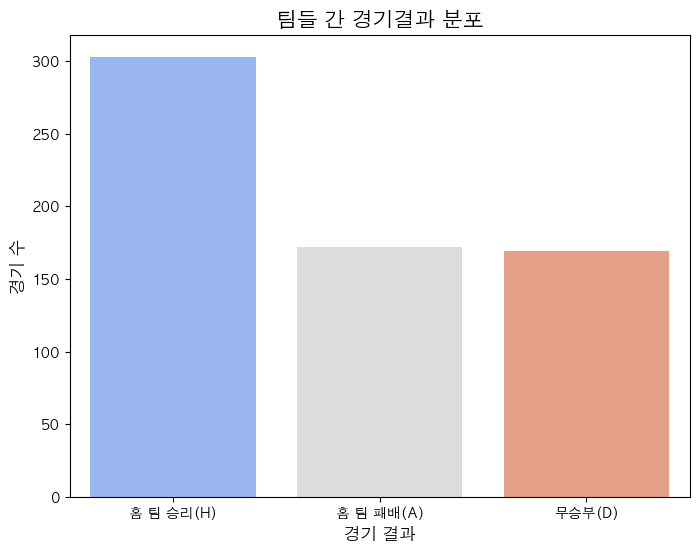

In [417]:
ftr_counts = big6['FTR'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_counts.index, y=ftr_counts.values, palette='coolwarm')
plt.title('팀들 간 경기결과 분포', fontsize=15)
plt.xlabel('경기 결과', fontsize=12)
plt.ylabel('경기 수', fontsize=12)
plt.xticks(range(len(ftr_counts)), ['홈 팀 승리(H)', '홈 팀 패배(A)', '무승부(D)'])

# 그래프 보여주기
plt.show()




<Figure size 1400x800 with 0 Axes>

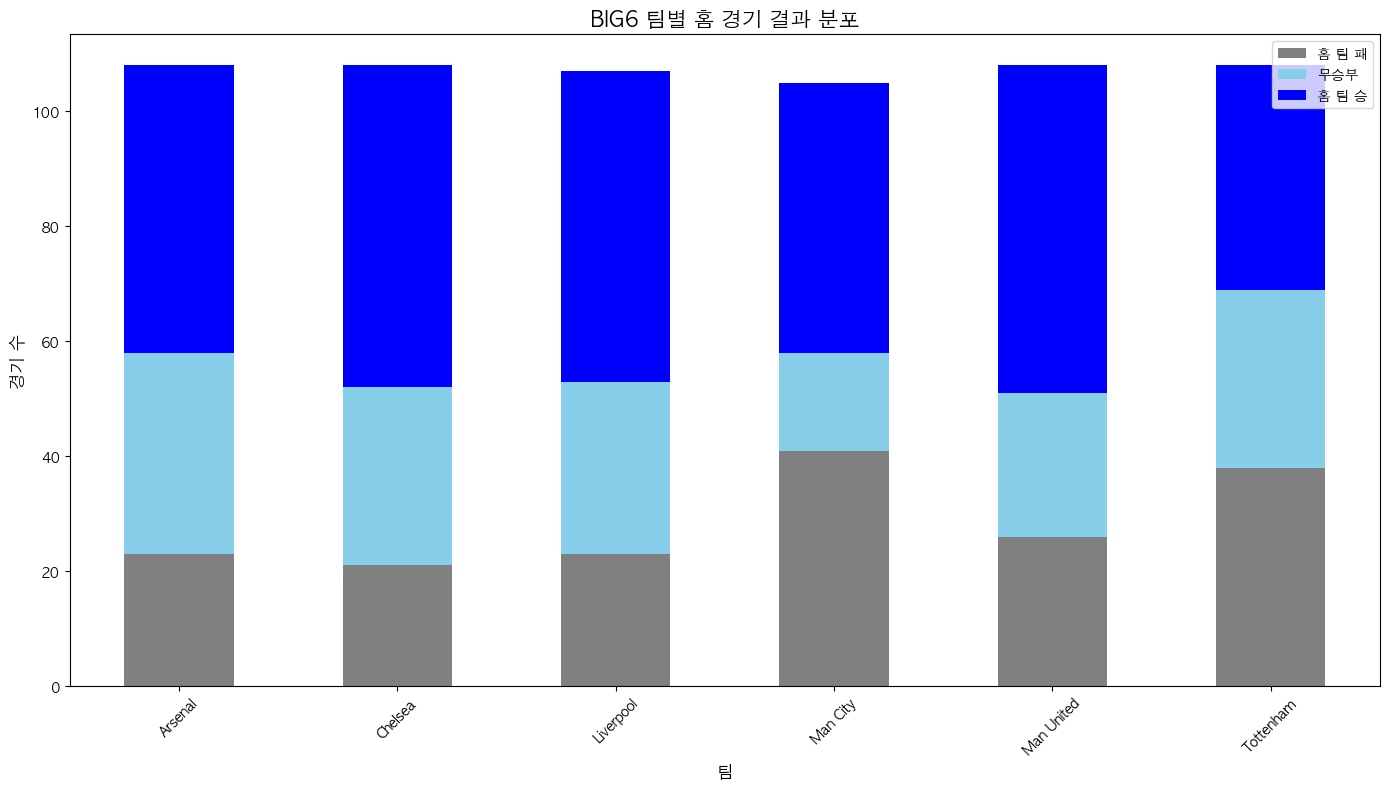

In [455]:
# 팀별 홈 경기 결과 집계하기
home_result = big6.groupby('HomeTeam')['FTR'].value_counts().unstack(fill_value=0)



# 홈 경기 결과 시각화를 위한 막대 그래프 준비
plt.figure(figsize=(14, 8))
home_result.plot(kind='bar', stacked=True, color=['gray', 'skyblue','blue' ], figsize=(14, 8))
plt.title('BIG6 팀별 홈 경기 결과 분포', fontsize=15)
plt.xlabel('팀', fontsize=12)
plt.ylabel('경기 수', fontsize=12)
plt.legend(['홈 팀 패', '무승부', '홈 팀 승'], loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# 막대 그래프 표시
plt.show()

In [454]:
home_result

FTR,-1.0,0.0,1.0
HomeTeam,,,
Arsenal,23,35,50
Chelsea,21,31,56
Liverpool,23,30,54
Man City,41,17,47
Man United,26,25,57
Tottenham,38,31,39


<Figure size 1400x800 with 0 Axes>

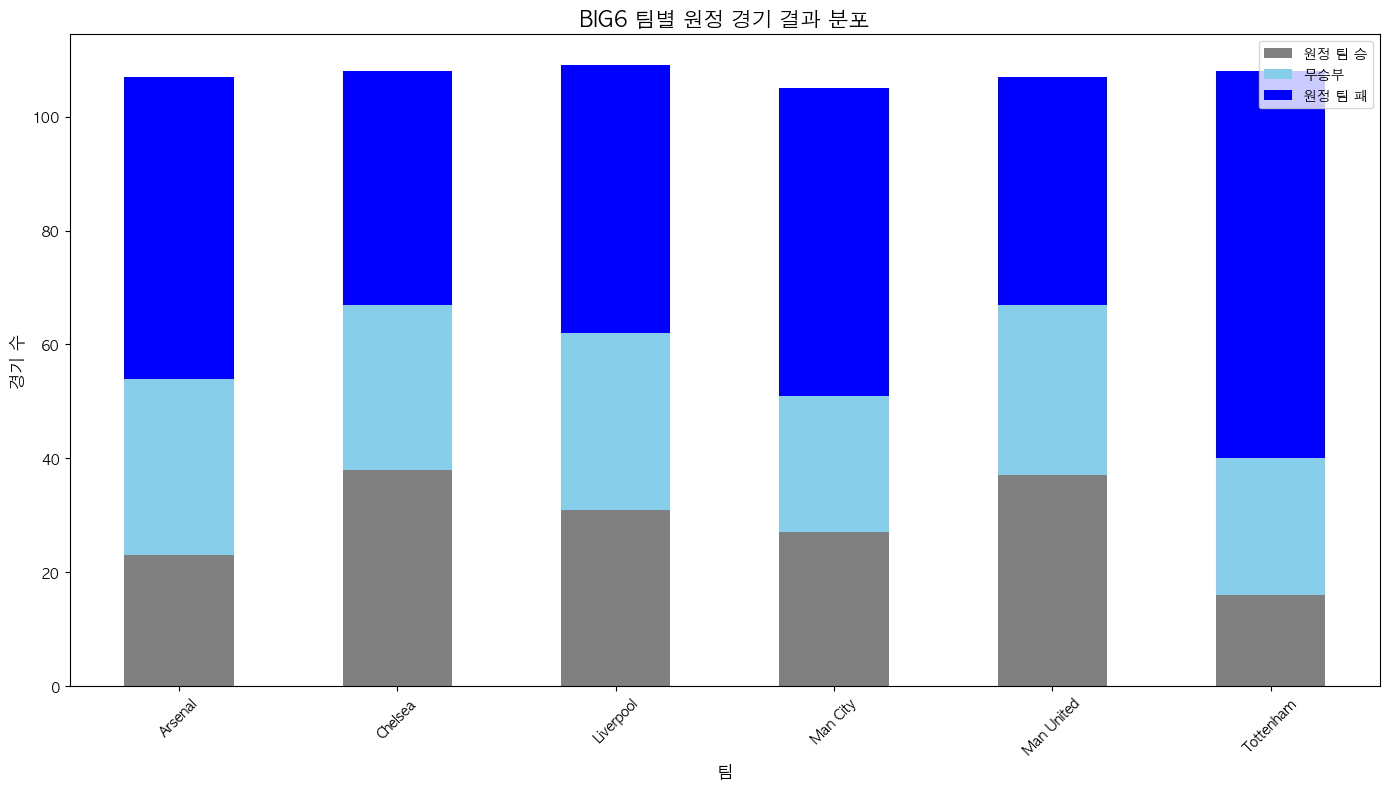

In [456]:
# 팀별 홈 경기 결과 집계하기
away_result = big6.groupby('AwayTeam')['FTR'].value_counts().unstack(fill_value=0)

# 시각화를 위한 데이터 체크
away_result.head()

# 홈 경기 결과 시각화를 위한 막대 그래프 준비
plt.figure(figsize=(14, 8))
away_result.plot(kind='bar', stacked=True, color=['gray', 'skyblue','blue'], figsize=(14, 8))
plt.title('BIG6 팀별 원정 경기 결과 분포', fontsize=15)
plt.xlabel('팀', fontsize=12)
plt.ylabel('경기 수', fontsize=12)
plt.legend(['원정 팀 승', '무승부', '원정 팀 패'], loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# 막대 그래프 표시
plt.show()

In [457]:
away_result

FTR,-1.0,0.0,1.0
AwayTeam,,,
Arsenal,23,31,53
Chelsea,38,29,41
Liverpool,31,31,47
Man City,27,24,54
Man United,37,30,40
Tottenham,16,24,68


In [420]:
home_result

FTR,A,D,H
HomeTeam,,,
Arsenal,23,35,50
Chelsea,21,31,56
Liverpool,23,30,54
Man City,41,17,47
Man United,26,25,57
Tottenham,38,31,39


In [421]:
away_result

FTR,A,D,H
AwayTeam,,,
Arsenal,23,31,53
Chelsea,38,29,41
Liverpool,31,31,47
Man City,27,24,54
Man United,37,30,40
Tottenham,16,24,68


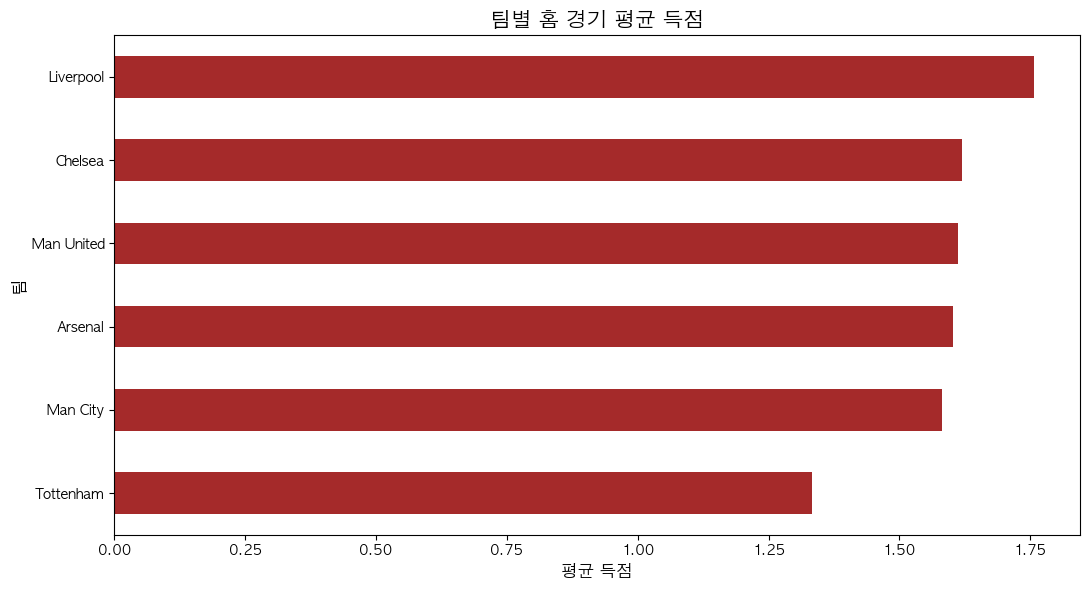

In [443]:
# 팀별 홈 경기에서의 평균 득점 계산
team_fthg_average = big6.groupby('HomeTeam')['FTHG'].mean().sort_values()

# 시각화
plt.figure(figsize=(11, 6))
team_fthg_average.plot(kind='barh', color='brown')
plt.title('팀별 홈 경기 평균 득점', fontsize=15)
plt.xlabel('평균 득점', fontsize=12)
plt.ylabel('팀', fontsize=12)
plt.tight_layout()

# 막대 그래프 표시
plt.show()

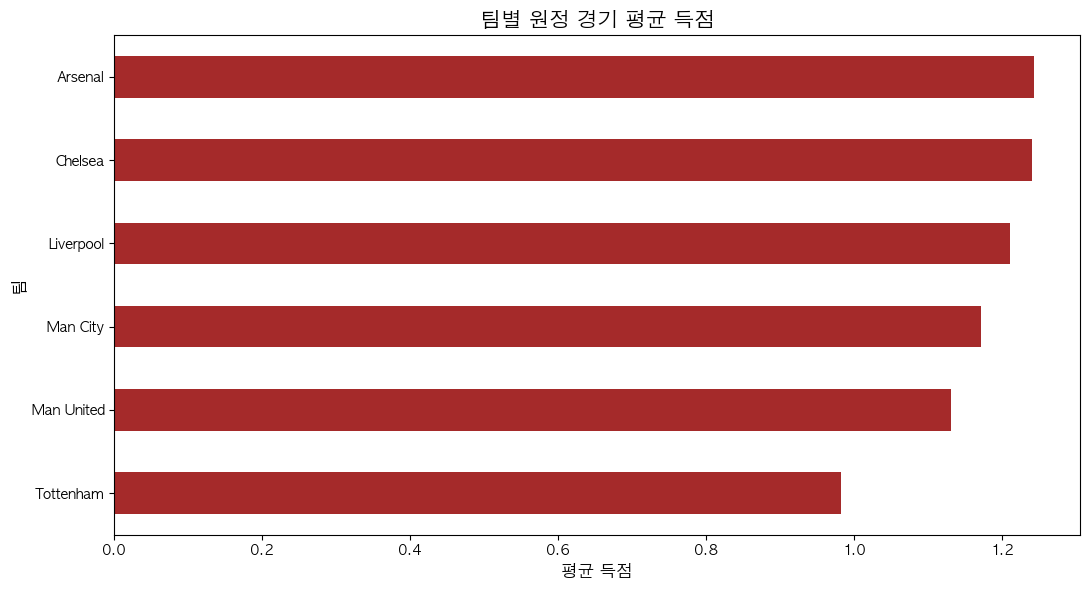

In [444]:
# 팀별 홈 경기에서의 평균 득점 계산
team_fthg_average = big6.groupby('AwayTeam')['FTAG'].mean().sort_values()

# 시각화
plt.figure(figsize=(11, 6))
team_fthg_average.plot(kind='barh', color='brown')
plt.title('팀별 원정 경기 평균 득점', fontsize=15)
plt.xlabel('평균 득점', fontsize=12)
plt.ylabel('팀', fontsize=12)
plt.tight_layout()

# 막대 그래프 표시
plt.show()

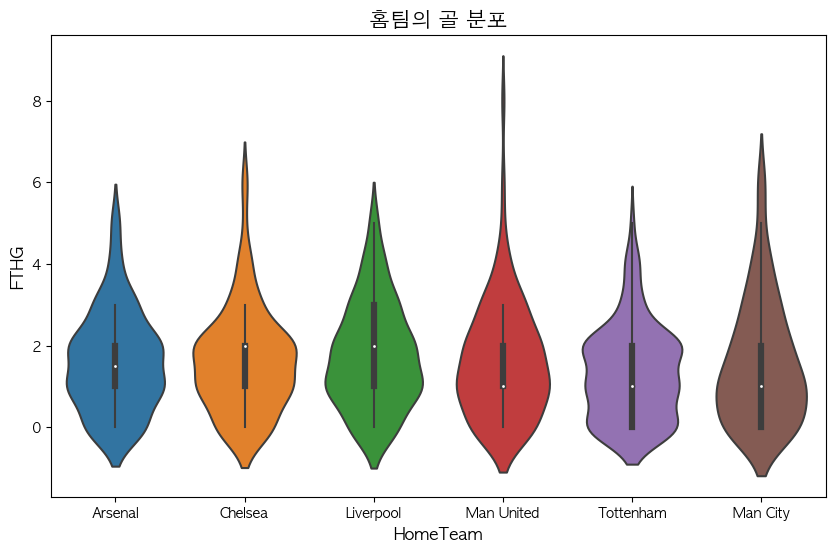

In [424]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='HomeTeam', y='FTHG', data=big6, alpha=0.5)
plt.title('홈팀의 골 분포', fontsize=15)
plt.xlabel('HomeTeam', fontsize=12)
plt.ylabel('FTHG', fontsize=12)

# 산점도 표시
plt.show()

/Users/juwonkim/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


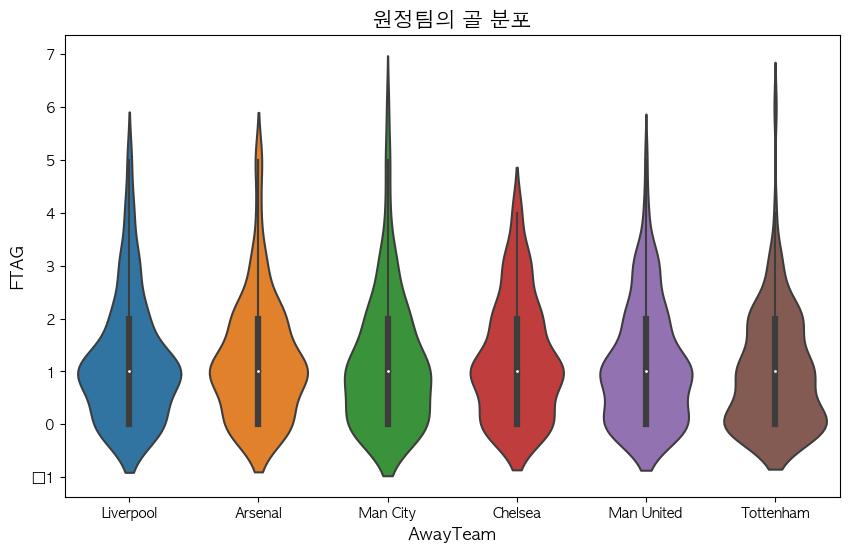

In [425]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='AwayTeam', y='FTAG', data=big6, alpha=0.5)
plt.title('원정팀의 골 분포', fontsize=15)
plt.xlabel('AwayTeam', fontsize=12)
plt.ylabel('FTAG', fontsize=12)

# 산점도 표시
plt.show()

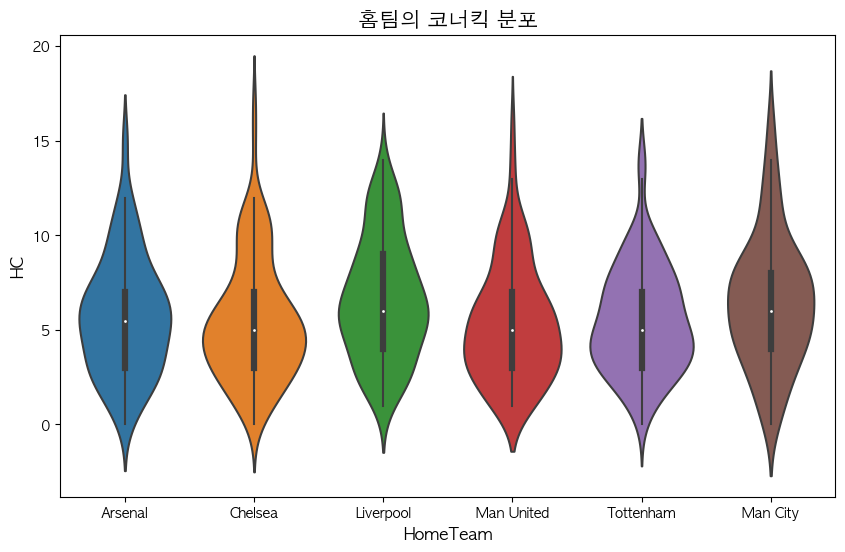

In [426]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='HomeTeam', y='HC', data=big6, alpha=0.5)
plt.title('홈팀의 코너킥 분포', fontsize=15)
plt.xlabel('HomeTeam', fontsize=12)
plt.ylabel('HC', fontsize=12)

# 산점도 표시
plt.show()

/Users/juwonkim/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


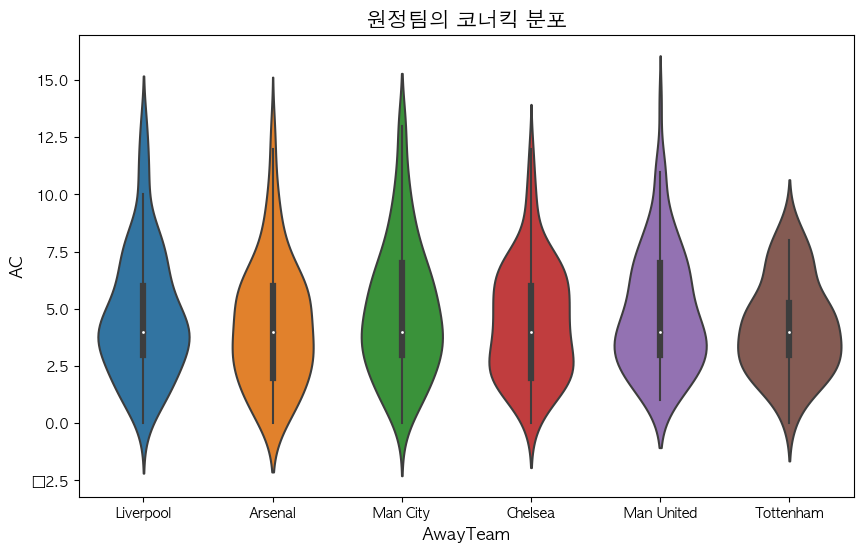

In [427]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='AwayTeam', y='AC', data=big6, alpha=0.5)
plt.title('원정팀의 코너킥 분포', fontsize=15)
plt.xlabel('AwayTeam', fontsize=12)
plt.ylabel('AC', fontsize=12)

# 산점도 표시
plt.show()

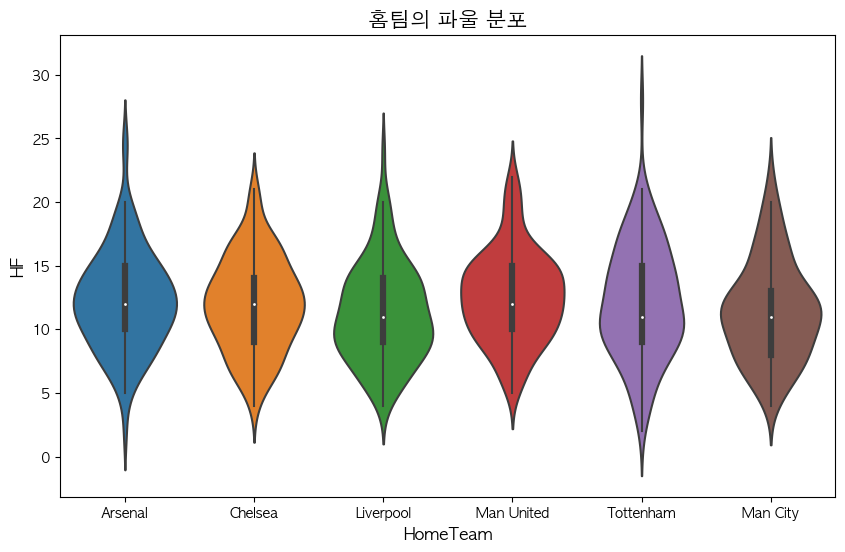

In [428]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='HomeTeam', y='HF', data=big6, alpha=0.5)
plt.title('홈팀의 파울 분포', fontsize=15)
plt.xlabel('HomeTeam', fontsize=12)
plt.ylabel('HF', fontsize=12)

# 산점도 표시
plt.show()

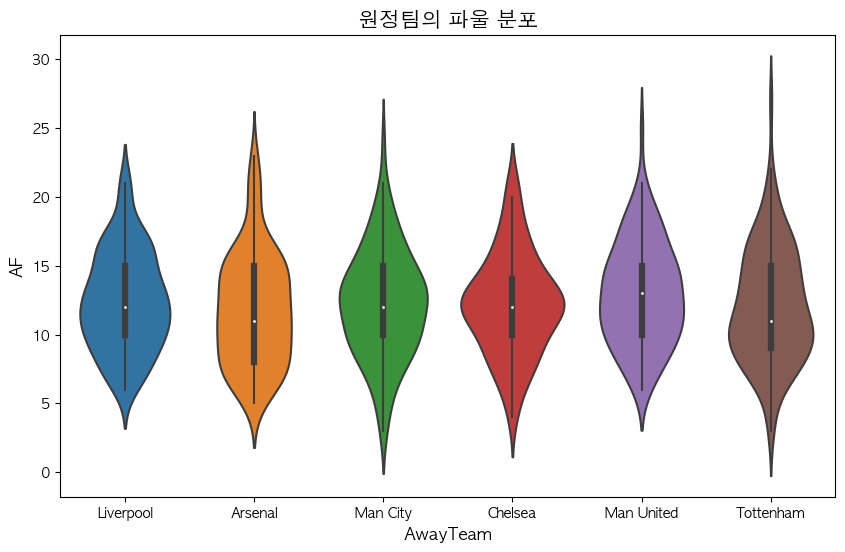

In [429]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='AwayTeam', y='AF', data=big6, alpha=0.5)
plt.title('원정팀의 파울 분포', fontsize=15)
plt.xlabel('AwayTeam', fontsize=12)
plt.ylabel('AF', fontsize=12)

# 산점도 표시
plt.show()

## FTR, HTR
홈팀이 이겼을때 더 가중치를 주기위해 홈팀이 이겼을때 1, 비겼을때 0, 졌을때 -1로 전처리

In [430]:
ftr_mapping = {'H': 1, 'D': 0, 'A': -1}
big6['FTR'] = big6['FTR'].map(ftr_mapping).astype(float)

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_26112/146318277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big6['FTR'] = big6['FTR'].map(ftr_mapping).astype(float)


In [431]:
htr_mapping = {'H': 1, 'D': 0, 'A': -1}
big6['HTR'] = big6['HTR'].map(htr_mapping).astype(float)

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_26112/3663374136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big6['HTR'] = big6['HTR'].map(htr_mapping).astype(float)


In [432]:
big6.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HY,AY,HR,AR,TY,Ref_Card_Style,FTTG,POSOAT,POSOHT,POSOT
Season,,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-21T00:00:00Z,Arsenal,Liverpool,2,0,1.0,1.0,0.0,1.0,Graham Poll,17.0,...,20.0,2.0,4.0,1.0,2.0,6.0,1,2,0.166667,0.500000,0.666667
2000-01,2000-09-06T00:00:00Z,Chelsea,Arsenal,2,2,0.0,1.0,0.0,1.0,Mike Riley,12.0,...,22.0,3.0,1.0,0.0,0.0,4.0,1,4,0.200000,0.200000,0.400000
2000-01,2000-09-09T00:00:00Z,Liverpool,Man City,3,2,1.0,1.0,0.0,1.0,Graham Barber,14.0,...,17.0,3.0,4.0,0.0,0.0,7.0,1,5,0.304348,0.347826,0.652174
2000-01,2000-09-23T00:00:00Z,Man United,Chelsea,3,3,0.0,3.0,2.0,1.0,Peter Jones,11.0,...,19.0,3.0,2.0,0.0,0.0,5.0,1,6,0.208333,0.208333,0.416667
2000-01,2000-09-23T00:00:00Z,Tottenham,Man City,0,0,0.0,0.0,0.0,0.0,Steve Bennett,18.0,...,14.0,0.0,2.0,0.0,0.0,2.0,0,0,0.080000,0.200000,0.280000


In [433]:
big6.dtypes

DateTime           object
HomeTeam           object
AwayTeam           object
FTHG                int64
FTAG                int64
FTR               float64
HTHG              float64
HTAG              float64
HTR               float64
Referee            object
HS                float64
AS                float64
HST               float64
AST               float64
HC                float64
AC                float64
HF                float64
AF                float64
HY                float64
AY                float64
HR                float64
AR                float64
TY                float64
Ref_Card_Style      int64
FTTG                int64
POSOAT            float64
POSOHT            float64
POSOT             float64
dtype: object

In [434]:
big6.columns

Index(['DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF',
       'AF', 'HY', 'AY', 'HR', 'AR', 'TY', 'Ref_Card_Style', 'FTTG', 'POSOAT',
       'POSOHT', 'POSOT'],
      dtype='object')

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_26112/2162799942.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = cor.corr()
/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/juwonkim/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


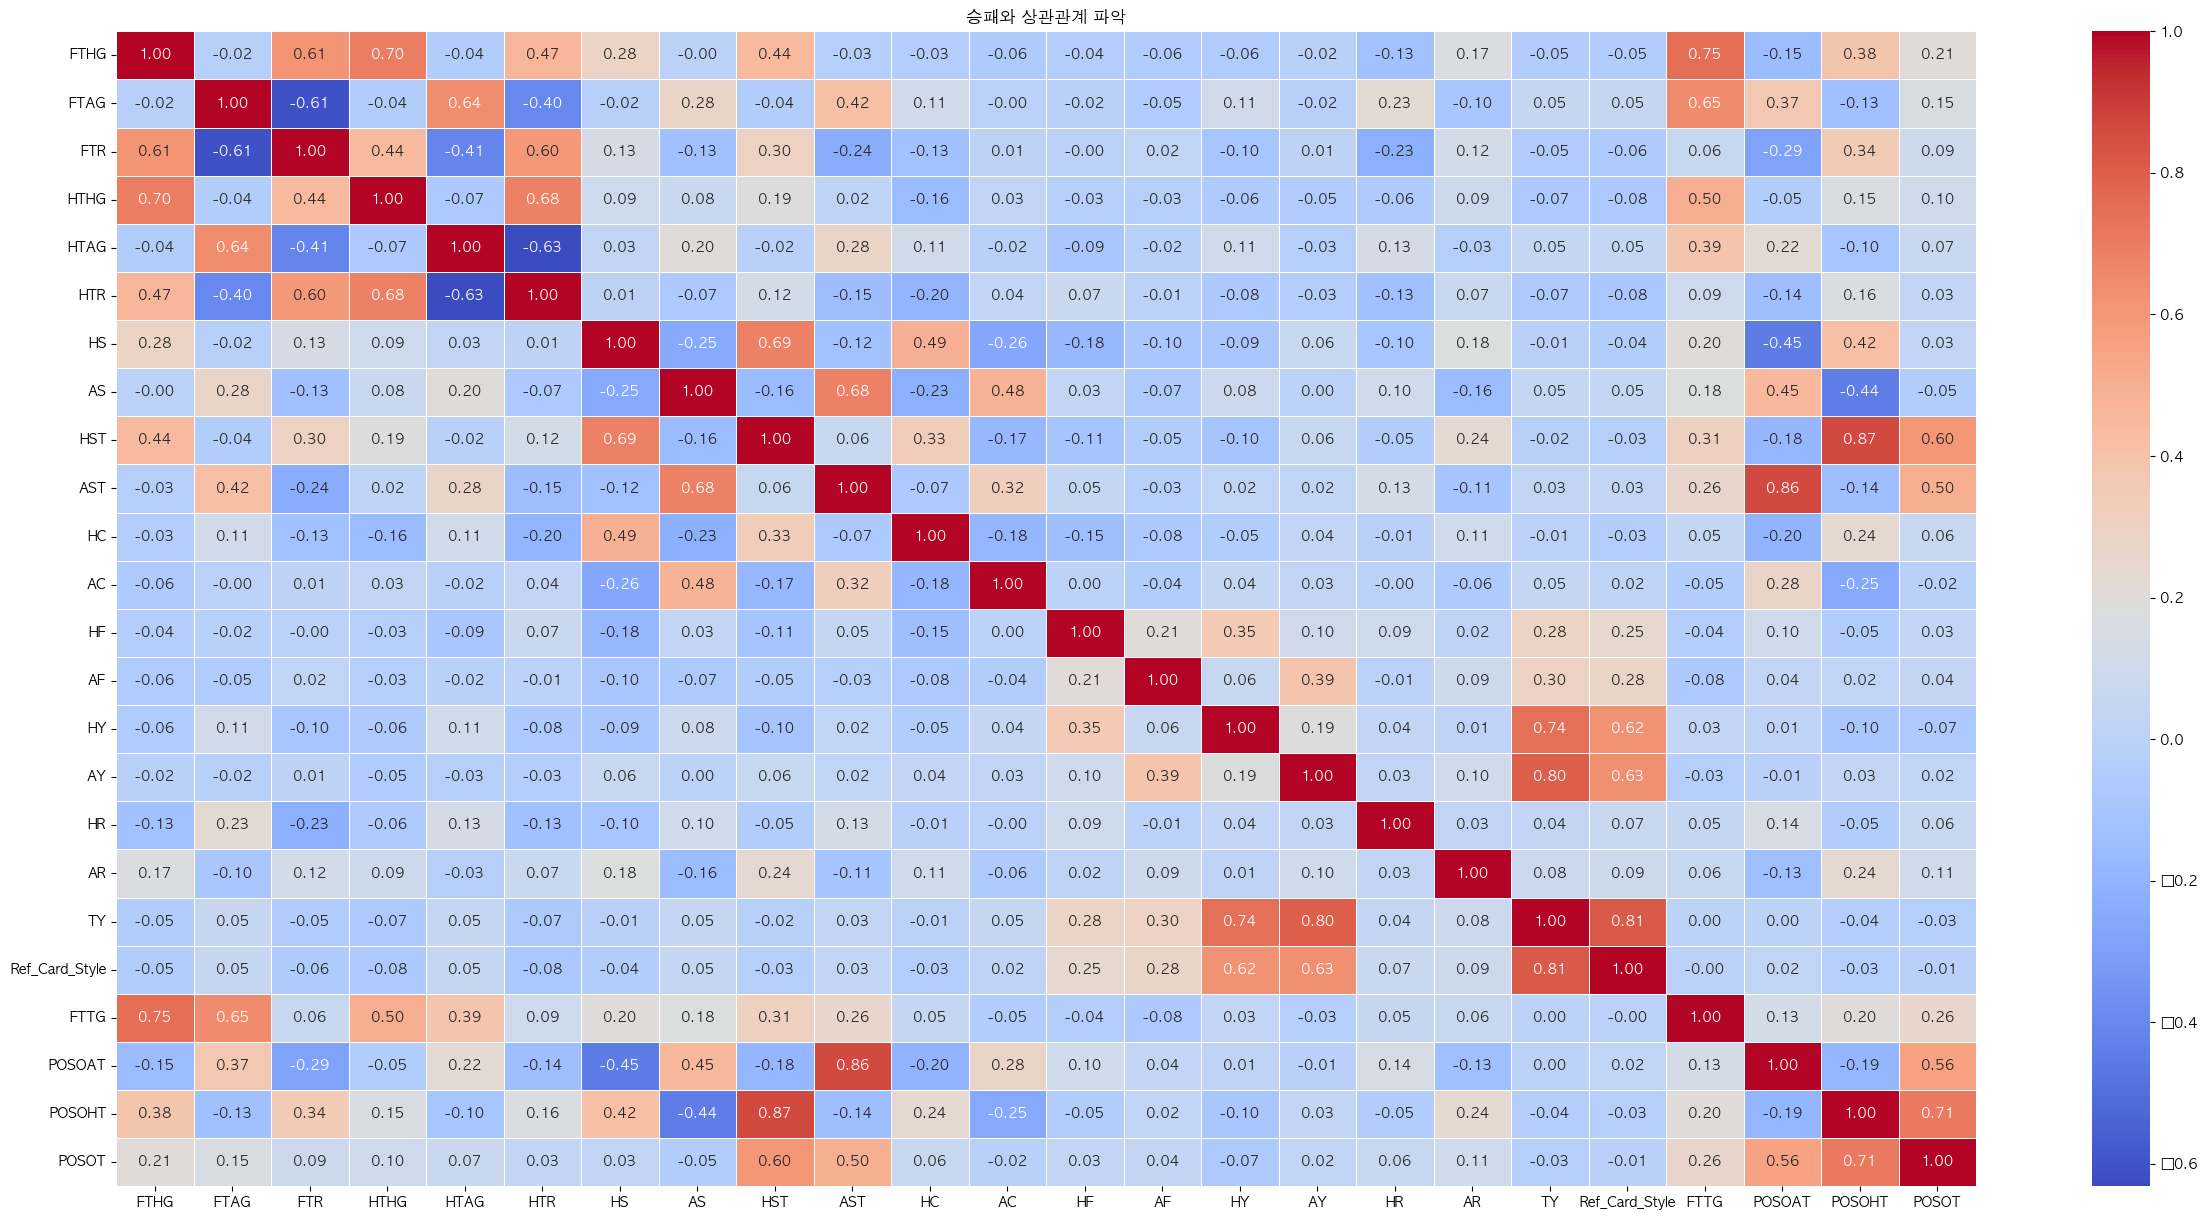

In [435]:
cor = big6.drop(['DateTime', 'HomeTeam', 'AwayTeam'],axis = 1)
corrs = cor.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('승패와 상관관계 파악')
plt.show()

In [436]:
big6.tail()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HY,AY,HR,AR,TY,Ref_Card_Style,FTTG,POSOAT,POSOHT,POSOT
Season,,,,,,,,,,,,,,,,,,,,,,,
2021-22,2022-02-19T17:30:00Z,Man City,Tottenham,2,3,-1.0,1.0,1.0,0.0,A Taylor,21.0,...,7.0,0.0,3.0,0.0,0.0,3.0,0,5,0.185185,0.148148,0.333333
2021-22,2022-03-06T16:30:00Z,Man City,Man United,4,1,1.0,2.0,1.0,1.0,M Oliver,24.0,...,14.0,0.0,1.0,0.0,0.0,1.0,0,5,0.068966,0.344828,0.413793
2021-22,2022-03-12T17:30:00Z,Man United,Tottenham,3,2,1.0,2.0,1.0,1.0,J Moss,10.0,...,7.0,2.0,1.0,0.0,0.0,3.0,0,5,0.150000,0.300000,0.450000
2021-22,2022-03-16T20:15:00Z,Arsenal,Liverpool,0,2,-1.0,0.0,0.0,0.0,A Marriner,9.0,...,9.0,0.0,1.0,0.0,0.0,1.0,0,2,0.166667,0.111111,0.277778
2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,0.0,2.0,1.0,1.0,A Taylor,11.0,...,11.0,1.0,4.0,0.0,0.0,5.0,1,4,0.235294,0.294118,0.529412
